<a href="https://colab.research.google.com/github/yamayama3689/finance/blob/main/%E6%A0%AA%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Date
0,0.978500,0.978500,0.984000,0.927500,0.959500,2003-01-02
1,1.026000,1.026000,1.026500,0.970500,0.979500,2003-01-03
2,1.035000,1.035000,1.058500,1.015000,1.020000,2003-01-06
3,1.077500,1.077500,1.087500,1.030000,1.041500,2003-01-07
4,1.051000,1.051000,1.080000,1.041000,1.072000,2003-01-08
...,...,...,...,...,...,...
5079,93.919998,93.919998,94.169998,92.180000,93.599998,2023-03-08
5080,92.250000,92.250000,96.209999,92.180000,93.680000,2023-03-09
5081,90.730003,90.730003,93.570000,90.250000,92.669998,2023-03-10
5082,92.430000,92.430000,94.019997,88.120003,89.970001,2023-03-13


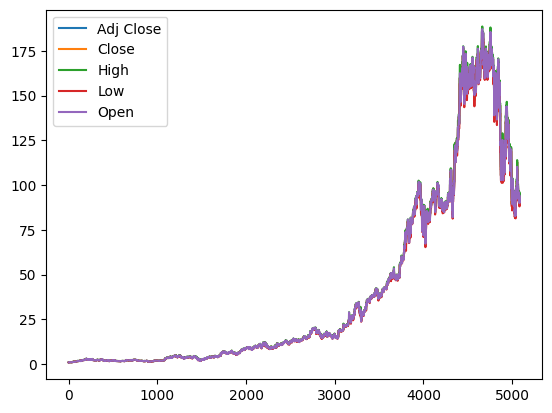

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import yfinance as yf

#ターゲットを指定
ticker = "AMZN"

#データを収集
data = yf.download(ticker, start= "2003-01-01",end="2023-03-15", interval = "1d",multi_level_index=False,auto_adjust=False)
df = data
#追加
df["Date"] = df.index
df = df.reset_index(drop=True)
df = df.drop("Volume", axis=1)
df_tmp = df.drop("Date",axis=1)
#可視化する
df_tmp.plot()
df

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5084 entries, 0 to 5083
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Adj Close  5084 non-null   float64       
 1   Close      5084 non-null   float64       
 2   High       5084 non-null   float64       
 3   Low        5084 non-null   float64       
 4   Open       5084 non-null   float64       
 5   Date       5084 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 238.4 KB


In [3]:
# 曜日情報を追加(月曜:0, 火曜:1, 水曜:2, 木曜:3, 金曜:4、土曜:5、日曜:6)
df['weekday'] = df['Date'].dt.weekday
# 週番号付与
# 基準日からの通算週数を計算
# 基準日を定義
base_date = pd.to_datetime('2003-01-06')
df['cumulative_week'] = (df['Date'] - base_date).dt.days // 7

df

,Adj Close,Close,High,Low,Open,Date,weekday,cumulative_week
0,0.978500,0.978500,0.984000,0.927500,0.959500,2003-01-02,3,-1
1,1.026000,1.026000,1.026500,0.970500,0.979500,2003-01-03,4,-1
2,1.035000,1.035000,1.058500,1.015000,1.020000,2003-01-06,0,0
3,1.077500,1.077500,1.087500,1.030000,1.041500,2003-01-07,1,0
4,1.051000,1.051000,1.080000,1.041000,1.072000,2003-01-08,2,0
...,...,...,...,...,...,...,...,...
5079,93.919998,93.919998,94.169998,92.180000,93.599998,2023-03-08,2,1052
5080,92.250000,92.250000,96.209999,92.180000,93.680000,2023-03-09,3,1052
5081,90.730003,90.730003,93.570000,90.250000,92.669998,2023-03-10,4,1052
5082,92.430000,92.430000,94.019997,88.120003,89.970001,2023-03-13,0,1053


In [5]:
# カラムの並び替え
df = df[['Date','cumulative_week', 'weekday', 'High', 'Low', 'Open', 'Close']] # 内側のカッコはリストの作成、外側のカッコはリストを最初からピックする
# データの並び替え
df.sort_values(by='Date', ascending=True)

,Date,cumulative_week,weekday,High,Low,Open,Close
0,2003-01-02,-1,3,0.984000,0.927500,0.959500,0.978500
1,2003-01-03,-1,4,1.026500,0.970500,0.979500,1.026000
2,2003-01-06,0,0,1.058500,1.015000,1.020000,1.035000
3,2003-01-07,0,1,1.087500,1.030000,1.041500,1.077500
4,2003-01-08,0,2,1.080000,1.041000,1.072000,1.051000
...,...,...,...,...,...,...,...
5079,2023-03-08,1052,2,94.169998,92.180000,93.599998,93.919998
5080,2023-03-09,1052,3,96.209999,92.180000,93.680000,92.250000
5081,2023-03-10,1052,4,93.570000,90.250000,92.669998,90.730003
5082,2023-03-13,1053,0,94.019997,88.120003,89.970001,92.430000


In [6]:
df

,Date,cumulative_week,weekday,High,Low,Open,Close
0,2003-01-02,-1,3,0.984000,0.927500,0.959500,0.978500
1,2003-01-03,-1,4,1.026500,0.970500,0.979500,1.026000
2,2003-01-06,0,0,1.058500,1.015000,1.020000,1.035000
3,2003-01-07,0,1,1.087500,1.030000,1.041500,1.077500
4,2003-01-08,0,2,1.080000,1.041000,1.072000,1.051000
...,...,...,...,...,...,...,...
5079,2023-03-08,1052,2,94.169998,92.180000,93.599998,93.919998
5080,2023-03-09,1052,3,96.209999,92.180000,93.680000,92.250000
5081,2023-03-10,1052,4,93.570000,90.250000,92.669998,90.730003
5082,2023-03-13,1053,0,94.019997,88.120003,89.970001,92.430000


In [7]:
#カラム情報を1行上にずらしたデータフレームを作成する
df_shift = df.shift(-1)

In [11]:
df['delta_Close'] = df_shift['Close'] - df['Close']

In [12]:
# 目的変数upを使いする（翌日の終値が上がる場合1、それ以外は0とする）
df['Up'] = 0
# [行の条件, 列名] = 代入する値
df.loc[df['delta_Close'] > 0, 'Up'] = 1
df = df.drop('delta_Close', axis=1)

In [13]:
df

,Date,cumulative_week,weekday,High,Low,Open,Close,Up
0,2003-01-02,-1,3,0.984000,0.927500,0.959500,0.978500,1
1,2003-01-03,-1,4,1.026500,0.970500,0.979500,1.026000,1
2,2003-01-06,0,0,1.058500,1.015000,1.020000,1.035000,1
3,2003-01-07,0,1,1.087500,1.030000,1.041500,1.077500,0
4,2003-01-08,0,2,1.080000,1.041000,1.072000,1.051000,1
...,...,...,...,...,...,...,...,...
5079,2023-03-08,1052,2,94.169998,92.180000,93.599998,93.919998,0
5080,2023-03-09,1052,3,96.209999,92.180000,93.680000,92.250000,0
5081,2023-03-10,1052,4,93.570000,90.250000,92.669998,90.730003,1
5082,2023-03-13,1053,0,94.019997,88.120003,89.970001,92.430000,1


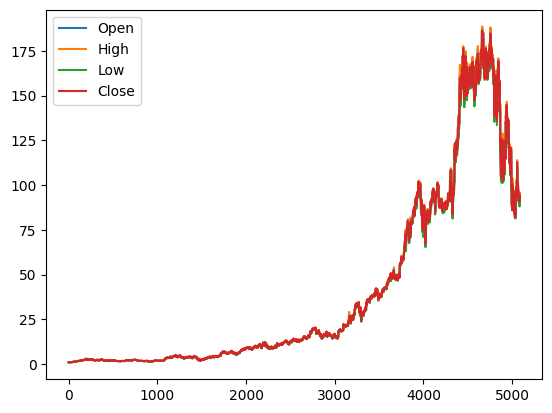

In [14]:
# データの全体像をつかむ

df_new = df[['Open','High','Low','Close']]

# 時系列折れ線グラフの作成
df_new.plot(kind='line')
plt.show()

In [15]:
# 特徴量の追加

# 終値の前日比
df_shift = df.shift(1) # 今日の終値 - 前日の終値

df['Close_ratio'] = (df['Close'] - df_shift['Close']) / df_shift['Close']

# 始値と終値の差分を追加
df['Body'] = df['Open'] - df['Close']

In [16]:
df

,Date,cumulative_week,weekday,High,Low,Open,Close,Up,Close_ratio,Body
0,2003-01-02,-1,3,0.984000,0.927500,0.959500,0.978500,1,NaN,-0.019000
1,2003-01-03,-1,4,1.026500,0.970500,0.979500,1.026000,1,0.048544,-0.046500
2,2003-01-06,0,0,1.058500,1.015000,1.020000,1.035000,1,0.008772,-0.015000
3,2003-01-07,0,1,1.087500,1.030000,1.041500,1.077500,0,0.041063,-0.036000
4,2003-01-08,0,2,1.080000,1.041000,1.072000,1.051000,1,-0.024594,0.021000
...,...,...,...,...,...,...,...,...,...,...
5079,2023-03-08,1052,2,94.169998,92.180000,93.599998,93.919998,0,0.003955,-0.320000
5080,2023-03-09,1052,3,96.209999,92.180000,93.680000,92.250000,0,-0.017781,1.430000
5081,2023-03-10,1052,4,93.570000,90.250000,92.669998,90.730003,1,-0.016477,1.939995
5082,2023-03-13,1053,0,94.019997,88.120003,89.970001,92.430000,1,0.018737,-2.459999


In [17]:
# 不要なデータの削除
# 月曜日から金曜日までのデータがそろっている週を使用する

# 週番号をリストに格納
list_weeks = []
list_weeks = df['cumulative_week'].unique()
list_weeks

array([  -1,    0,    1, ..., 1051, 1052, 1053])

In [18]:
# 各週ごとの日数を入力
df['week_days'] = 0

# 'week_days'列を新たに作成
# df.groupby('cumulative_week')['cumulative_week']で週ごとにグループ化
# .transform('count')で各グループの行数（日数）を取得し、元のデータフレームに結合
df.loc[:, 'week_days'] = df.groupby('cumulative_week')['cumulative_week'].transform('count')

In [19]:
# 5日データが存在する週のデータを抜き出して、dfに入力
df = df[df['week_days'] == 5]

In [20]:
# 予測に使用しない金曜日のデータを削除
df = df[df['weekday'] != 4]

In [21]:
# 不要カラムの削除と並べ替え
df = df[['Date','weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body', 'Up']]

In [22]:
# 学習データを2003-01-06〜2020-12-31の期間としdf_trainに入力する
# 'Date'列をdatetime型に変換
df['Date'] = pd.to_datetime(df['Date'])

# 'Date'列をインデックスに設定
df = df.set_index('Date')

# インデックスが日付型になったので、スライスが可能
df_train = df[ : '2020-12-31']

In [23]:
# 検証データを2021-01-01以降としてとしてdf_valに入力する
df_val = df['2021-01-01' : ]

In [26]:
X_train = df_train[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body']]
y_train = df_train['Up']

print(X_train)
print(y_train)

            weekday        High         Low        Open       Close  \
Date                                                                  
2003-01-06        0    1.058500    1.015000    1.020000    1.035000   
2003-01-07        1    1.087500    1.030000    1.041500    1.077500   
2003-01-08        2    1.080000    1.041000    1.072000    1.051000   
2003-01-09        3    1.085000    1.045000    1.054000    1.072500   
2003-01-13        0    1.105000    1.062500    1.066500    1.102000   
...             ...         ...         ...         ...         ...   
2020-12-10        3  157.104996  153.800003  154.449493  155.074493   
2020-12-14        0  159.523499  156.300003  157.149994  157.848495   
2020-12-15        1  159.425003  156.524506  159.050507  158.255997   
2020-12-16        2  162.350006  158.184006  158.800507  162.048004   
2020-12-17        3  163.175507  161.050003  162.500000  161.804001   

            Close_ratio      Body  
Date                               
2003

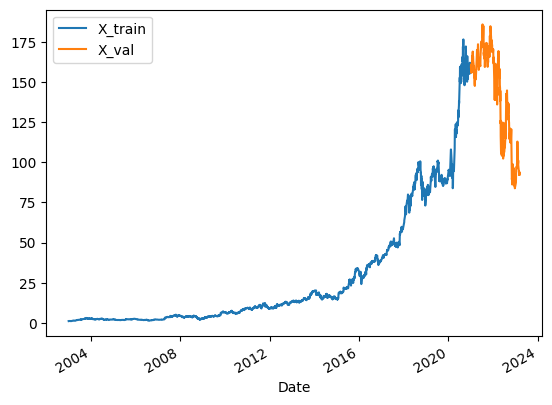

In [28]:
# 学習データと検証データの終値の折れ線グラフ作成
X_train['Close'].plot(kind='line')
df_val['Close'].plot(kind='line')
plt.legend(['X_train', 'X_val'])

plt.show()